In [1]:
#importing


import torch
import torch.nn as nn 
import torch.optim as optim 
import torch.nn.functional as F # activation functions.....etc
from torch.utils.data import DataLoader # easier dataset management
import torchvision.datasets as datasets 
import torchvision.transforms as transforms 
import torchvision

In [2]:
#set device

device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
#hyperparameters

in_channel=3
num_classes=10
lr=0.001
batch_size=1024
num_epochs=10

In [39]:
import sys

model=torchvision.models.vgg16(pretrained=True)


In [6]:
for param in model.parameters():
    param.requires_grad = False
#print(model)
model.avgpool=Identity() # to remove
model.classifier=nn.Sequential(
                nn.Linear(512,100),
                nn.Dropout(p=0.5),
                nn.Linear(100,10)

)

model.to(device)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [40]:

#print(model)
model.avgpool=Identity() # to remove
model.classifier=nn.Sequential(
                nn.Linear(512,100),
                nn.Dropout(p=0.5),
                nn.Linear(100,10)

)

model.to(device)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [5]:
class Identity(nn.Module):
  def __init__(self):
    super(Identity,self).__init__()

  def forward(self,x):
    return x

In [7]:
train_dataset=datasets.CIFAR10(root='dataset/',train=True, transform=transforms.ToTensor(),download=True)
train_loader=DataLoader(dataset=train_dataset,batch_size=batch_size,shuffle=True)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting dataset/cifar-10-python.tar.gz to dataset/


In [8]:
loss_function=nn.CrossEntropyLoss()
opt=optim.Adam(model.parameters(),lr=lr)

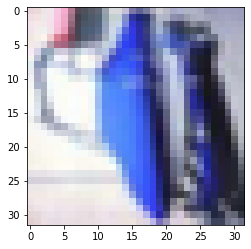

torch.Size([32, 32, 3])


In [38]:
from matplotlib import pyplot as plt

for batch_idx,(data,target) in enumerate(train_loader):
  if(batch_idx==2):
    data=data[0].swapaxes(0,2)
    plt.imshow(data,interpolation='nearest')
    plt.show()
    print(data.shape)
    break


In [42]:
num_epochs=3
for epoch in range(num_epochs):
  losses=[]

  for batch_idx,(data,target) in enumerate(train_loader):
    data=data.to(device=device)
    targets=target.to(device=device)

    scores=model(data)
    loss=loss_function(scores,targets)

    losses.append(loss)

    opt.zero_grad()
    loss.backward()

    opt.step()

  mean_loss=sum(losses)/len(losses)
  print("Loss at epoch: "+str(epoch)+ " is: "+str(mean_loss))

#check accuracy 

def accuracy_check(loader,model): # get the dataset(loader here), and trained model

  if(loader.dataset.train):
    print("Train accuracy: ")
  else:
    print("Test accuracy: ")

  num_correct=0
  num_samples=0

  model.eval()

  with torch.no_grad(): # no need to train now
    for x,y in loader:
      x=x.to(device=device).squeeze(1)
      y=y.to(device=device)

      #x=x.reshape(x.shape[0],-1)
      scores=model(x)
      #64 X 10

      _,predictions=scores.max(1) # get the max index of each ROW
      num_correct+=(predictions==y).sum() # here in each iteration of the loop, a batch of size 64 will be passed here. In each batch ,
                                          #we have 64 data. We sum all these 64 data predictions ( 1 or 0)
      num_samples+=predictions.size(0)

    acc=num_correct/num_samples*100
    print(acc)

    


Loss at epoch: 0 is: tensor(2.3588, device='cuda:0', grad_fn=<DivBackward0>)
Loss at epoch: 1 is: tensor(2.3595, device='cuda:0', grad_fn=<DivBackward0>)
Loss at epoch: 2 is: tensor(2.3608, device='cuda:0', grad_fn=<DivBackward0>)


In [12]:
accuracy_check(train_loader, model)

Train accuracy: 
tensor(63.4480, device='cuda:0')


In [43]:
accuracy_check(train_loader, model)

Train accuracy: 
tensor(10.8040, device='cuda:0')
